In [1]:
import json 
import pyalex as alex
alex.config.email = "noah0roussel01980@gmail.com"


In [2]:
import pandas as pd

data = pd.read_csv('data/sources/Q1_names.csv', sep=';')
q1_data = data[data["SJR Quartile"] == "Q1"]


q1_names = q1_data["Title"].tolist()
sjr_dict = dict(zip(q1_data["Title"], q1_data["SJR"]))


In [3]:
# change les noms pour qu'ils correspondent à OpenAlex
import re
def normalize(text):
    text = text.lower()                 
    text = text.replace("&", "and")     
    text = text.replace(",", "")     
    return text

# Normalize doesnt work ?
for i, name in enumerate(q1_names):
    if name == "International Journal of Neuropsychopharmacology":
        q1_names[i] = "The International Journal of Neuropsychopharmacology"
        sjr_dict[q1_names[i]] = sjr_dict.pop(name)
    elif name == "Chinese Medicine (United Kingdom)":
        q1_names[i] = "Chinese Medicine"
        sjr_dict[q1_names[i]] = sjr_dict.pop(name)
    elif name == "Biomolecules and Therapeutics": 
        q1_names[i] = "Biomolecules & Therapeutics"
        sjr_dict[q1_names[i]] = sjr_dict.pop(name)

In [4]:
bjp = (
    alex.Sources()["s55107261"] # ID OpenAlex of the BJP
)

with open("data/sources/bjp.json", "w") as f:
    json.dump(bjp, f, indent = 4)

bjp_counts_by_year = bjp["counts_by_year"]
with open("data/sources/bjp_counts_by_year.json", "w") as f:
    json.dump(bjp_counts_by_year, f, indent = 4)    
df_bjp= pd.read_json("data/sources/bjp_counts_by_year.json")

q1_journals_info = []

for journal in q1_names:
    source = alex.Sources().search(f'"{journal}"')
    found = False
    for page in range(1, 10):  
        results = source.get(page=page, per_page=200)
        if not results:
            break
        for r in results:
            if normalize(r["display_name"]) == normalize(journal):
                r["SJR"] = sjr_dict[journal] 
                q1_journals_info.append(r)
                found = True
                break
        if found:
            break
    if not found:
        print(f"{journal} non trouvé")
    else:
        print(f"{journal} trouvé")

Nature Reviews Drug Discovery trouvé
Pharmacological Reviews trouvé
Drug Resistance Updates trouvé
Journal for ImmunoTherapy of Cancer trouvé
Molecular Therapy trouvé
Pharmacology and Therapeutics trouvé
Trends in Pharmacological Sciences trouvé
Medicinal Research Reviews trouvé
Neuropsychopharmacology trouvé
Pharmacological Research trouvé
Cell Chemical Biology trouvé
British Journal of Pharmacology trouvé
Cellular and Molecular Life Sciences trouvé
Acta Pharmacologica Sinica trouvé
BioDrugs trouvé
Asian Journal of Pharmaceutical Sciences trouvé
npj Vaccines trouvé
Apoptosis trouvé
Clinical Pharmacology and Therapeutics trouvé
Neurotherapeutics trouvé
Pain trouvé
European Neuropsychopharmacology trouvé
PharmacoEconomics trouvé
Biomedicine and Pharmacotherapy trouvé
Progress in Neuro-Psychopharmacology and Biological Psychiatry trouvé
Drug Discovery Today trouvé
Journal of Psychopharmacology trouvé
Phytomedicine trouvé
CNS Neuroscience and Therapeutics trouvé
Drug and Alcohol Dependenc

In [5]:
with open("data/sources/bjp.json", "w") as f:
    json.dump(bjp, f, indent = 4)

with open("data/sources/q1_journals.json", "w", encoding="utf-8") as f:
    json.dump(q1_journals_info, f, ensure_ascii=False, indent=4)


df_q1 = pd.DataFrame(q1_journals_info)
df_q1_csv = df_q1.to_csv("data/sources/q1_journals.csv", index=False, sep=';')

# Journals with the higher SJR than BJP (3.801)
df_top11 = df_q1.sort_values(by="SJR", ascending=False).head(11).copy()
df_top11_csv = df_top11.to_csv("data/sources/top11_journals.csv", index=False, sep=';')

df_q1["SJR"] = df_q1["SJR"].str.replace(',', '.')
df_q1["SJR"] = pd.to_numeric(df_q1["SJR"], errors='coerce')

print(df_q1.head())


                                 id     issn_l                    issn  \
0   https://openalex.org/S186543748  1474-1776  [1474-1776, 1474-1784]   
1   https://openalex.org/S161680845  0031-6997  [0031-6997, 1521-0081]   
2    https://openalex.org/S47159833  1368-7646  [1368-7646, 1532-2084]   
3  https://openalex.org/S2754803477  2051-1426             [2051-1426]   
4    https://openalex.org/S51596929  1525-0016  [1525-0016, 1525-0024]   

                          display_name                 host_organization  \
0        Nature Reviews Drug Discovery  https://openalex.org/P4310319908   
1              Pharmacological Reviews  https://openalex.org/P4310316283   
2              Drug Resistance Updates  https://openalex.org/P4310320990   
3  Journal for ImmunoTherapy of Cancer  https://openalex.org/P4310319945   
4                    Molecular Therapy  https://openalex.org/P4310320990   

                              host_organization_name  \
0                                   Nature

C:\Users\noahr\AppData\Local\Temp\ipykernel_11212\179306254.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SJR", y="display_name", data=df_q1, palette="viridis")


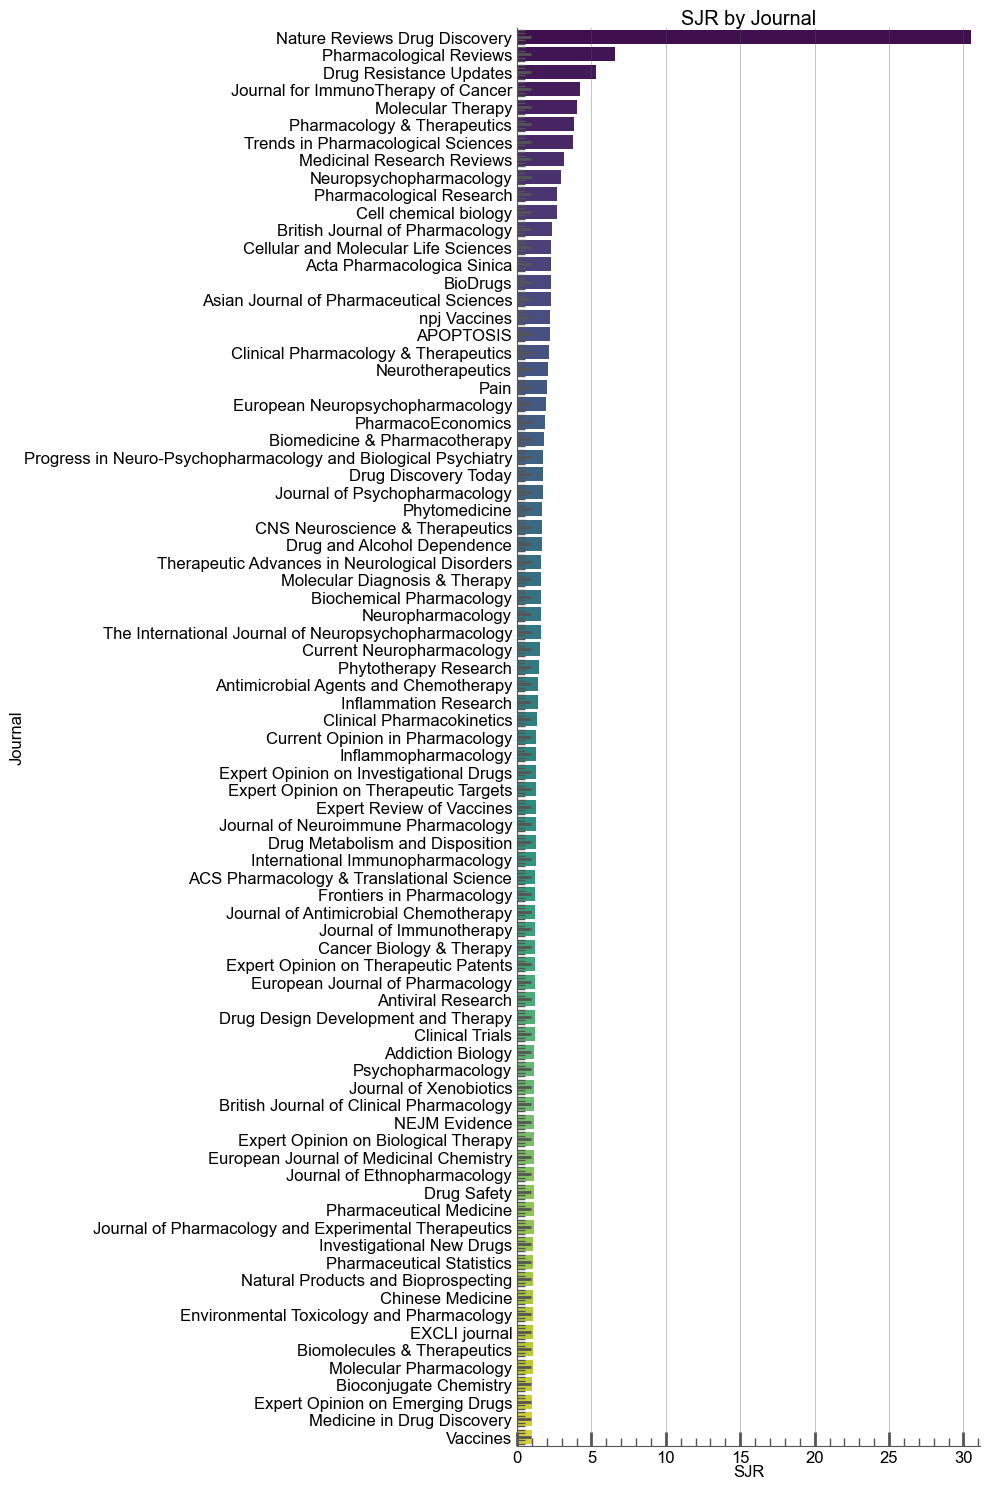

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import aquarel as aq

with aq.load_theme("scientific"):
    plt.figure(figsize=(10,15))
    sns.barplot(x="SJR", y="display_name", data=df_q1, palette="viridis")
    plt.xlabel("SJR")
    plt.ylabel("Journal")
    plt.title("SJR by Journal")
    plt.tight_layout()
    plt.show()


     year  works_count  cited_by_count  oa_works_count
0  2025.0   287.629630    11510.407407       85.888889
1  2024.0   357.740741    19617.432099      164.135802
2  2023.0   320.950617    20398.629630      202.481481
3  2022.0   342.308642    20134.086420      234.827160
4  2021.0   338.012346    19463.814815      219.481481
   year  works_count  oa_works_count  cited_by_count  works_count_avg_q1  \
0  2025          271              79           23529          287.629630   
1  2024          343             181           41765          357.740741   
2  2023          313             194           45248          320.950617   
3  2022          265             218           47966          342.308642   
4  2021          462             421           51647          338.012346   

   cited_by_count_avg_q1  oa_works_count_avg_q1  works_count_top_q1  \
0           11510.407407              85.888889               166.5   
1           19617.432099             164.135802               155.0   


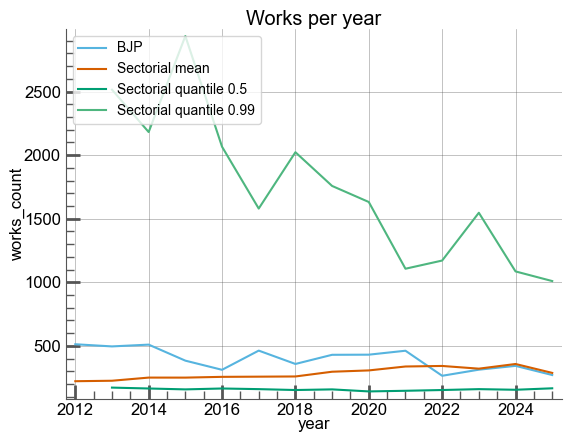

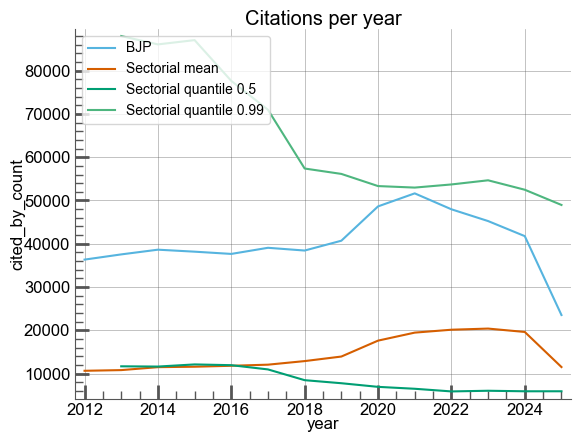

In [7]:
df_q1_counts = pd.DataFrame({'year':[],'works_count':[],'cited_by_count':[]})


for i in range(df_q1.shape[0]):    
    temp = df_q1.loc[i, "counts_by_year"]
    for j in temp:
        df_q1_counts = pd.concat([df_q1_counts, pd.DataFrame([j])], ignore_index = True)    
df_q1_counts = df_q1_counts.iloc[::-1].reset_index(drop=True)

df_avg_q1 = df_q1_counts.groupby("year").mean().sort_index(ascending=False)
df_avg_q1 = df_avg_q1.reset_index()  

top = 0.5
toptop = 0.99

df_top_q1 = df_q1_counts.groupby("year").quantile(top)
df_top_q1.drop(index = 2025, inplace = True)
df_top_q1 = df_top_q1.reset_index() 

df_toptop_q1 = df_q1_counts.groupby("year").quantile(toptop)
df_toptop_q1.drop(index = 2025, inplace = True)
df_toptop_q1 = df_toptop_q1.reset_index() 


df_bjp_and_q1 = df_bjp
df_bjp_and_q1["works_count_avg_q1"] = df_avg_q1["works_count"]
df_bjp_and_q1["cited_by_count_avg_q1"] = df_avg_q1["cited_by_count"]
df_bjp_and_q1["oa_works_count_avg_q1"] = df_avg_q1["oa_works_count"]

df_bjp_and_q1["works_count_top_q1"] = df_top_q1["works_count"]
df_bjp_and_q1["cited_by_count_top_q1"] = df_top_q1["cited_by_count"]
df_bjp_and_q1["oa_works_count_top_q1"] = df_top_q1["oa_works_count"]

df_bjp_and_q1["works_count_toptop_q1"] = df_toptop_q1["works_count"]
df_bjp_and_q1["cited_by_count_toptop_q1"] = df_toptop_q1["cited_by_count"]
df_bjp_and_q1["oa_works_count_top_q1"] = df_toptop_q1["oa_works_count"]


print(df_avg_q1.head())
print(df_bjp_and_q1.head())

with aq.load_theme("scientific"):
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "works_count", label = "BJP")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "works_count_avg_q1", label = "Sectorial mean")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "works_count_top_q1", label = f"Sectorial quantile {top}")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "works_count_toptop_q1", label = f"Sectorial quantile {toptop}")
    plt.legend(loc = "upper left")
    plt.title("Works per year")
    plt.show()

with aq.load_theme("scientific"):
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "cited_by_count", label = "BJP")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "cited_by_count_avg_q1", label = "Sectorial mean")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "cited_by_count_top_q1", label = f"Sectorial quantile {top}")
    sns.lineplot(data = df_bjp_and_q1, x = "year", y = "cited_by_count_toptop_q1", label = f"Sectorial quantile {toptop}")
    plt.legend(loc = "upper left")
    plt.title("Citations per year")
    plt.show()

In [8]:
bjp_topic_share = bjp["topic_share"]
df_topic_share = pd.DataFrame(bjp_topic_share).sort_values(by = "value", ascending = False)

top5_topics_bjp = df_topic_share[["display_name", "value"]].head(n = 5)
top5_topics_bjp.columns = ["Topic", "Share (%)"]
top5_topics_bjp["Share (%)"] = top5_topics_bjp["Share (%)"] * 100
top5_topics_bjp.to_csv("data/results/top5_topics_bjp.csv", index = False, sep=';')


topic_share_q1 = pd.DataFrame()
for index in df_q1.index:
    for j in df_q1.loc[index, "topic_share"]:
        topic_share_q1 = pd.concat([topic_share_q1, pd.DataFrame([j])], ignore_index = True)
topic_share_q1_treated = (topic_share_q1[["display_name", "value"]].groupby(by = "display_name").mean()).sort_values(by = "value", ascending = False)

topic_share_q1_treated.reset_index(inplace = True)
top5_topics_q1 = topic_share_q1_treated.loc[:,["display_name", "value"]].head(n = 5)
top5_topics_q1.columns = ["Topic", "Share (%)"]
top5_topics_q1["Share (%)"] = top5_topics_q1["Share (%)"] * 100
top5_topics_q1.to_csv("data/results/top5_topics_q1.csv", index = False, sep=';')

topic_share_top11 = pd.DataFrame()
for index in df_top11.index:
    for j in df_top11.loc[index, "topic_share"]:
        topic_share_top11 = pd.concat([topic_share_top11, pd.DataFrame([j])], ignore_index = True)
topic_share_top11_treated = (topic_share_top11[["display_name", "value"]].groupby(by = "display_name").mean()).sort_values(by = "value", ascending = False)

topic_share_top11_treated.reset_index(inplace = True)
top5_topics_top11 = topic_share_top11_treated.loc[:,["display_name", "value"]].head(n = 5)
top5_topics_top11.columns = ["Topic", "Share (%)"]
top5_topics_top11["Share (%)"] = top5_topics_top11["Share (%)"] * 100
top5_topics_top11.to_csv("data/results/top5_topics_top11.csv", index = False, sep=';')

In [9]:
data = []

pager = alex.Works().filter(locations={"source": {"id": "s55107261"}}).paginate(per_page = 200, n_max = None)
for page in pager:
    for work in page:
        authors = []
        institutions = []
        countries = []
        for i in work.get("authorships"):
            authors.append((i.get("author")).get("id"))

            for j in i.get("institutions"):
                institutions.append([j.get("display_name"), j.get("id")])

            for j in i.get("countries"):
                countries.append(j)

        new = {
            "title": work.get("title"),
            "year": work.get("publication_year"),
            "cited_by_count": work.get("cited_by_count"),          
            "countries_distinct_count": work.get("countries_distinct_count"),
            "institutions_distinct_count": work.get("institutions_distinct_count"),
            "citation_normalized_percentile": work.get("citation_normalized_percentile"),
            "primary_topic": work.get("primary_topic"), 
            "keywords": work.get("keywords"), 
            "concepts": work.get("concepts"),
            "referenced_works_count": work.get("referenced_works_count"),
            "referenced_works": work.get("referenced_works"), 
            "abstract": work["abstract"],
            "abstract_inverted_index": work.get("abstract_inverted_index"),
            "journal":work.get("primary_location").get("source").get("display_name")
        }
        for i in range(1, len(authors) + 1):
            new[f"author_{i}"] = authors[i - 1]
        for i in range(1, len(institutions) + 1):
            new[f"institution_{i}"] = institutions[i - 1]
        for i in range(1, len(countries) + 1):
            new[f"country_{i}"] = countries[i - 1]
        for i in work.get("counts_by_year"):
            new[f"cited_by_count_{i.get("year")}"] = i.get("cited_by_count")
        if work.get("primary_topic") != None:
            new["primary_topic"] =  (work.get("primary_topic")).get("display_name"),
            new["primary_subfield"] =  ((work.get("primary_topic")).get("subfield")).get("display_name"),
            new["primary_field"] =  ((work.get("primary_topic")).get("field")).get("display_name"),
            new["primary_domain"] =  ((work.get("primary_topic")).get("domain")).get("display_name"),

        count = 1
        for i in work.get("keywords"):
            new[f"keyword_{count}"] = i.get("display_name")
            count += 1

            
        data.append(new)
data = pd.DataFrame(data)

In [10]:
data.to_csv("data/works/works_bjp.csv", index = False)

In [11]:
top11_journals = df_top11[["display_name", "SJR", "cited_by_count", "host_organization", "works_count", "id"]].sort_values(by = "SJR", ascending = False).reset_index()

works_count_top11 = 0
for source in top11_journals["id"]:
    result = alex.Works().filter(locations={"source": {"id": source}}).get()
    works_count_top11 += result.meta["count"]
print(f"Total works in top 11 journals: {works_count_top11}")


Total works in top 11 journals: 74618


In [12]:

from pyalex import Works
def fetch_works_for_journal(source_id):
    data_local = []
    pager = Works().filter(locations={"source": {"id": source_id}}).paginate(per_page=200, n_max=None)

    for page in pager:
        for work in page:
            authors = [(i.get("author")).get("id") for i in work.get("authorships", [])]

            institutions = []
            countries = []
            for i in work.get("authorships", []):
                institutions.extend([[j.get("display_name"), j.get("id")] for j in i.get("institutions", [])])
                countries.extend(i.get("countries", []))

            new = {
                "title": work.get("title"),
                "year": work.get("publication_year"),
                "cited_by_count": work.get("cited_by_count"),
                "countries_distinct_count": work.get("countries_distinct_count"),
                "institutions_distinct_count": work.get("institutions_distinct_count"),
                "citation_normalized_percentile": work.get("citation_normalized_percentile"),
                "primary_topic": work.get("primary_topic"),
                "keywords": work.get("keywords"),
                "concepts": work.get("concepts"),
                "referenced_works_count": work.get("referenced_works_count"),
                "referenced_works": work.get("referenced_works"),
                "abstract": work.get("abstract"),
                "abstract_inverted_index": work.get("abstract_inverted_index"),
                "journal": work.get("primary_location", {}).get("source", {}).get("display_name"),
            }

            for i, author in enumerate(authors, 1):
                new[f"author_{i}"] = author
            for i, inst in enumerate(institutions, 1):
                new[f"institution_{i}"] = inst
            for i, country in enumerate(countries, 1):
                new[f"country_{i}"] = country
            for i in work.get("counts_by_year", []):
                new[f"cited_by_count_{i.get('year')}"] = i.get("cited_by_count")

            if work.get("primary_topic") is not None:
                new["primary_topic"] = work["primary_topic"].get("display_name")
                new["primary_subfield"] = work["primary_topic"]["subfield"].get("display_name")
                new["primary_field"] = work["primary_topic"]["field"].get("display_name")
                new["primary_domain"] = work["primary_topic"]["domain"].get("display_name")

            for idx, kw in enumerate(work.get("keywords", []), 1):
                new[f"keyword_{idx}"] = kw.get("display_name")

            data_local.append(new)

    return data_local


In [14]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# === Parallélisation sur les journaux ===
start_time = time.time()
data = []

journal_ids = top11_journals["id"].to_list()

with ThreadPoolExecutor(max_workers=3) as executor:
    futures = {executor.submit(fetch_works_for_journal, jid): jid for jid in journal_ids}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Extraction works"):
        data.extend(future.result())

elapsed = time.time() - start_time
print(f"\nExtraction terminée : {len(data)} works récupérés en {elapsed/60:.1f} min")


Extraction works: 100%|██████████| 11/11 [02:34<00:00, 14.05s/it]


Extraction terminée : 74609 works récupérés en 2.6 min


In [15]:
data_chunks = [] # batching to avoid memory saturation
for i in range(0, len(data), 10_000):
    data_chunks.append(data[i:i + 10_000])
data = pd.DataFrame()
for i in range(len(data_chunks)):
    data_chunks[i] = pd.DataFrame(data_chunks[i])

df = pd.concat(data_chunks)
print(len(df))
df.to_csv("data/works/works_top11.csv", index = False)



74609


In [16]:
top_journals = df_q1[["display_name", "SJR", "cited_by_count", "host_organization", "works_count", "id"]].sort_values(by = "SJR", ascending = False).reset_index()

works_count = 0
for source in top_journals["id"]:
    result = alex.Works().filter(locations={"source": {"id": source}}).get()
    works_count += result.meta["count"]
print(f"Total works in top journals: {works_count}")

Total works in top journals: 712454


In [17]:


# === Parallélisation sur les journaux ===
start_time = time.time()
data = []

journal_ids = top_journals["id"].to_list()

with ThreadPoolExecutor(max_workers=3) as executor:
    futures = {executor.submit(fetch_works_for_journal, jid): jid for jid in journal_ids}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Extraction works"):
        data.extend(future.result())

elapsed = time.time() - start_time
print(f"\nExtraction terminée : {len(data)} works récupérés en {elapsed/60:.1f} min")


Extraction works: 100%|██████████| 81/81 [59:54<00:00, 44.38s/it]   


Extraction terminée : 712466 works récupérés en 59.9 min


In [18]:
data_chunks = [] # batching to avoid memory saturation
for i in range(0, len(data), 10_000):
    data_chunks.append(data[i:i + 10_000])
data = pd.DataFrame()
for i in range(len(data_chunks)):
    data_chunks[i] = pd.DataFrame(data_chunks[i])
    
df = pd.concat(data_chunks)
print(len(df))
df.to_csv("data/works/works_q1.csv", index = False)

712466
